# Tutorial on `OpenStreetMap` and `Google Earth Engine` Python APIs 🌍🛰️
Myriam Prasow-Émond, PhD candidate in Earth Science & Engineering, Imperial College London (m.prasow-emond22@imperial.ac.uk)

## Python Environment
* Please create the `conda` environment `edsml-rs`, which should work for this tutorial and `open-geo-tutorial`.
* Note: this environment might NOT work for advanced machine learning using `tensorflow` and `keras`; you might have to create another environment specifically for this.

## Import modules

In [1]:
import ee # this is the 'earthengine-api' package
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox # OpenStreetMap API package
import shapely # for geometry operations
import geopandas as gpd
import geemap
import requests
import os
import zipfile
import xarray as xr
import rasterio
from matplotlib.patches import Patch
%matplotlib inline 
# or qt for interactive plots

# for LaTeX-like fonts :)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

/opt/homebrew/Caskroom/miniconda/base/envs/edsml-rs/lib/python3.10/site-packages/google/api_core/_python_version_support.py:275: FutureWarning: You are using a Python version (3.10.19) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


# `OpenStreetMap` (OSM) Python API 🌍
* `OSM` is an open-access map database collaboratively maintained by a community of users who contribute and update its information (similarly to Wikipedia).
* It can be used for a variety of purposes, such as route network analysis (for traffic), GIS analysis, and provide an editable map of the world.
* The quality of the data has been investigated in multiple scientific papers (see e.g., https://www.nature.com/articles/s41598-021-82404-z).
* `OSMnx` is the Python API for extracting `OSM` data.
* Here are some links for further documentation:
    * https://www.openstreetmap.org/
    * https://osmnx.readthedocs.io/en/stable/
    * https://github.com/gboeing/osmnx-examples

## Define the area of interest 🔍
* There are various methods to query OSM data for a specific location, such as using coordinates (longitude, latitude), a polygon, or a bounding box.
* You can also input the name of a place, such as Greater London!

In [9]:
# make sure to add as much information so that it queries the right location :)
roi = 'Greater London, England, UK'

## Define the features of interest, i.e. the **tags** 🔗
* The features/tags is what you want to extract, such as the road network, rivers, amenities, etc.
* You can find the full list of tags/features here: https://wiki.openstreetmap.org/wiki/Map_features

In [10]:
# all the primary roads
tags_roads = {'highway': 'primary'}

# amenities: universities
tags_universities = {'amenity': 'university'}

# rivers
tags_rivers = {'waterway': 'river'}

## Quick example: all rivers in London queries using `OSMnx`

In [11]:
# extent of Greater London
gdf_London = ox.geocode_to_gdf(roi)
gdf_London

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-0.51038 51.46809, -0.51036 51.46795...",-0.510375,51.28676,0.334016,51.691874,259398780,relation,175342,51.507446,-0.127765,boundary,administrative,10,0.8921,city,Greater London,"Greater London, England, United Kingdom"


In [12]:
# features of interest within the extent of Greater London
gdf_roads = ox.features_from_place(roi, tags_roads)
gdf_universities = ox.features_from_place(roi, tags_universities)
gdf_rivers = ox.features_from_place(roi, tags_rivers)

gdf_roads

geometry  \
element id                                                              
way     74          LINESTRING (-0.19312 51.60172, -0.19305 51.601...   
        75          LINESTRING (-0.17679 51.61732, -0.17679 51.616...   
        79          LINESTRING (-0.19799 51.59712, -0.19778 51.596...   
        482         LINESTRING (-0.16049 51.67116, -0.16024 51.670...   
        1210        LINESTRING (-0.18023 51.63981, -0.18017 51.639...   
...                                                               ...   
        1466293530    LINESTRING (-0.29037 51.47837, -0.2904 51.4783)   
        1466293531  LINESTRING (-0.29036 51.47841, -0.29037 51.47837)   
        1466293532    LINESTRING (-0.2904 51.4783, -0.29043 51.47824)   
        1466858836  LINESTRING (-0.11245 51.49884, -0.11235 51.49881)   
        1467888434     LINESTRING (0.05826 51.55439, 0.05829 51.5544)   

                    highway traffic_signals:direction crossing:island  \
element id                                                              
way     74          primary                       NaN             NaN   
        75          primary                       NaN             NaN   
        79          primary                       NaN             NaN   
        482         primary                       NaN             NaN   
        1210        primary                       NaN             NaN   
...                     ...                       ...             ...   
        1466293530  primary                       NaN             NaN   
        1466293531  primary                       NaN             NaN   
        1466293532  primary                       NaN             NaN   
        1466858836  primary                       NaN             NaN   
        1467888434  primary                       NaN             NaN   

                                    source junction                     name  \
element id                                                                     
way     74                             NaN      NaN            Ballards Lane   
        75                             NaN      NaN                High Road   
        79          survey;local knowledge      NaN            East End Road   
        482                            NaN      NaN         Cockfosters Road   
        1210                           NaN      NaN                High Road   
...                                    ...      ...                      ...   
        1466293530              gps traces      NaN                 Kew Road   
        1466293531              gps traces      NaN                 Kew Road   
        1466293532              gps traces      NaN                 Kew Road   
        1466858836                     NaN      NaN  Westminster Bridge Road   
        1467888434                     NaN      NaN             Romford Road   

                   foot segregated   wikidata  ... toll  \
element id                                     ...        
way     74          NaN        NaN        NaN  ...  NaN   
        75          NaN        NaN        NaN  ...  NaN   
        79          NaN        NaN        NaN  ...  NaN   
        482         NaN        NaN        NaN  ...  NaN   
        1210        NaN        NaN        NaN  ...  NaN   
...                 ...        ...        ...  ...  ...   
        1466293530  NaN        NaN        NaN  ...  NaN   
        1466293531  NaN        NaN        NaN  ...  NaN   
        1466293532  NaN        NaN        NaN  ...  NaN   
        1466858836  NaN        NaN   Q7989130  ...  NaN   
        1467888434  NaN        NaN  Q66741928  ...  NaN   

                   cycleway:both:segregated turn:bicycle:lanes:backward  \
element id                                                                
way     74                              NaN                         NaN   
        75                              NaN                         NaN   
        79                              NaN         

### Quick plot

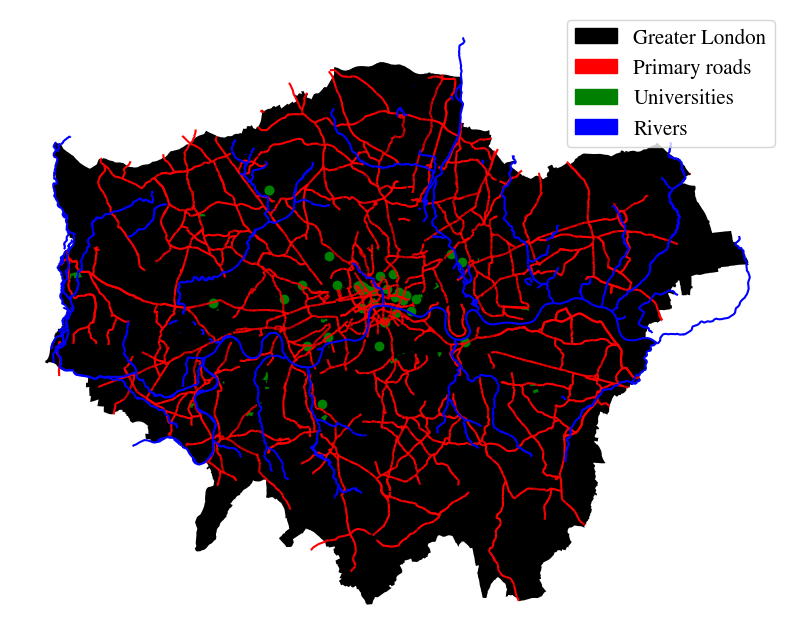

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

# plot the data
gdf_London.plot(ax=ax, color='k')
gdf_roads.plot(ax=ax, color='red')
gdf_universities.plot(ax=ax, color='green')
gdf_rivers.plot(ax=ax, color='blue')

# custom legend
legend_elements = [
    Patch(facecolor='black', edgecolor='black', label='Greater London'),
    Patch(facecolor='red', edgecolor='red', label='Primary roads'),
    Patch(facecolor='green', edgecolor='green', label='Universities'),
    Patch(facecolor='blue', edgecolor='blue', label='Rivers'),
]

# aesthetics
ax.legend(handles=legend_elements, fontsize=15)
ax.axis('off')

plt.show()


## Python `class` for calculating the distance between `OSM` features and a grid

In [14]:
class DistanceGridCalculator:
    def __init__(self, roi:str, crs:int=4326):
        """
        Initialise the class with a region of interest.
        
        Parameters:
            roi (str): The region of interest, e.g., 'Greater London, England, UK'.
            crs (int): The coordinate reference system for calculations.
        """
        self.roi = roi
        self.crs = crs
        # define the extent of the region of interest in projected coordinates
        self.extent_roi = ox.geocode_to_gdf(self.roi).to_crs(f'EPSG:{self.crs}')

    def create_meshgrid(self, n:int=10):
        """
        Create a meshgrid over the extent of the region of interest.
        
        Parameters:
            n (int): Size of the meshgrid.
        
        Returns:
            GeoDataFrame: Points generated from the meshgrid.
        """
        # create a meshgrid using the bounding box of the GeoDataFrame
        minx, miny, maxx, maxy = self.extent_roi.total_bounds
        x = np.linspace(minx, maxx, n)
        y = np.linspace(miny, maxy, n)
        self.X, self.Y = np.meshgrid(x, y)

        # create a GeoDataFrame from the meshgrid
        points = gpd.GeoDataFrame(
            geometry=[shapely.geometry.Point(px, py) for px, py in zip(self.X.ravel(), self.Y.ravel())],
            crs=f"EPSG:{self.crs}",
        )
        return points

    def create_meshgrid_from_image(self, image:xr.DataArray, scale:int=10):

        """
        Create a meshgrid of points in latitude and longitude from an xarray DataArray.
        
        Parameters:
            image (xr.DataArray): The input image with lat/lon coordinates.
            scale (int): Factor by which to reduce the resolution of the grid.
            
        Returns:
            gpd.GeoDataFrame: Points generated from the meshgrid in lat/lon coordinates.
        """
        # extract latitude and longitude coordinates
        lat = image["lat"].values
        lon = image["lon"].values

        # create a meshgrid
        self.X, self.Y = np.meshgrid(lon, lat)

        # create a GeoDataFrame from the meshgrid
        points = gpd.GeoDataFrame(
            geometry=[shapely.geometry.Point(lon, lat) for lon, lat in zip(self.X.ravel(), self.Y.ravel())],
            crs=image.attrs.get("crs", "EPSG:4326"),  # Default to WGS84 if CRS is not in the attributes
        )

        return points


    def compute_distance_grid(self, points_gdf:gpd.GeoDataFrame, feature_gdf:gpd.GeoDataFrame, mask:bool=True):
        """
        Compute a distance grid for a feature within the given extent.
        
        Parameters:
            points_gdf (GeoDataFrame): Points from the meshgrid.
            feature_gdf (GeoDataFrame): Features (e.g., rivers, roads) to compute distances from.
        
        Returns:
            np.ndarray: Distance grid with distances in meters
        """
        if mask:
            # mask points outside the geometry of interest
            mask = points_gdf.geometry.within(self.extent_roi.union_all())

            points_within = points_gdf[mask]

            # compute distances for points within the mask (vectorized)
            distances = points_within.geometry.apply(lambda point: feature_gdf.distance(point).min())

            # store distances in a grid
            distances_grid = np.full(self.X.shape, np.nan)
            distances_grid.ravel()[mask] = distances.values
        
        else:
            # compute distances for all points (vectorized)
            distances = points_gdf.geometry.apply(lambda point: feature_gdf.distance(point).min())

            # store distances in a grid
            distances_grid = np.full(self.X.shape, np.nan)
            distances_grid.ravel()[:] = distances.values

        return distances_grid

    def plot_grid(self, distances_grid, features, labels, cmap='plasma', colorbar_label='Distance (m)', figsize=(10, 10)):
        """
        Plot the distance grid along with features and extent.
        
        Parameters:
            distances_grid (np.ndarray): Distance grid to plot.
            features (list): List of GeoDataFrames for features to plot.
            labels (list): Labels corresponding to the features.
            cmap (str): Colormap for the grid.
            colorbar_label (str): Label for the colorbar.
            figsize (tuple): Size of the figure.
        """
        fig, ax = plt.subplots(figsize=figsize)

        # plot distance grid
        minx, miny, maxx, maxy = self.extent_roi.total_bounds
        cf = ax.imshow(distances_grid, cmap=cmap, extent=[minx, maxx, miny, maxy], origin='lower')

        # plot features
        for feature, label in zip(features, labels):
            feature.plot(ax=ax, alpha=0.7, edgecolor='black', facecolor='none', legend=True, label=label)
        
        # aesthetics
        ax.legend(handles=legend_elements, fontsize=15)

        # add colorbar
        cbar = plt.colorbar(cf, ax=ax, label=colorbar_label)
        cbar.ax.tick_params(labelsize=15)
        cbar.ax.set_ylabel(colorbar_label, fontsize=20)

        # aesthetics
        ax.legend(fontsize=15)
        ax.axis('off')
        plt.show()

### Example: map of distance from rivers, roads and universities across Greater London

In [15]:
# initialise the class with the region of interest
calculator = DistanceGridCalculator(roi, crs=3395)

# create a grid of points (80x80)
points_gdf = calculator.create_meshgrid(n=100)

# query features
osm_features_rivers = ox.features_from_place(calculator.roi, tags={'waterway': 'river'}).to_crs(f'EPSG:{calculator.crs}')
osm_features_primaryroads = ox.features_from_place(calculator.roi, tags={'highway': 'primary'}).to_crs(f'EPSG:{calculator.crs}')
osm_features_universities = ox.features_from_place(calculator.roi, tags={'amenity': 'university'}).to_crs(f'EPSG:{calculator.crs}')

# compute distance grids
distances_grid_rivers = calculator.compute_distance_grid(points_gdf, osm_features_rivers)
distances_grid_primaryroads = calculator.compute_distance_grid(points_gdf, osm_features_primaryroads)
distances_grid_universities = calculator.compute_distance_grid(points_gdf, osm_features_universities)

### Plot the results

/var/folders/8s/r1tv_zb133bd4kybngpj82fc0000gp/T/ipykernel_28950/398336430.py:131: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(fontsize=15)


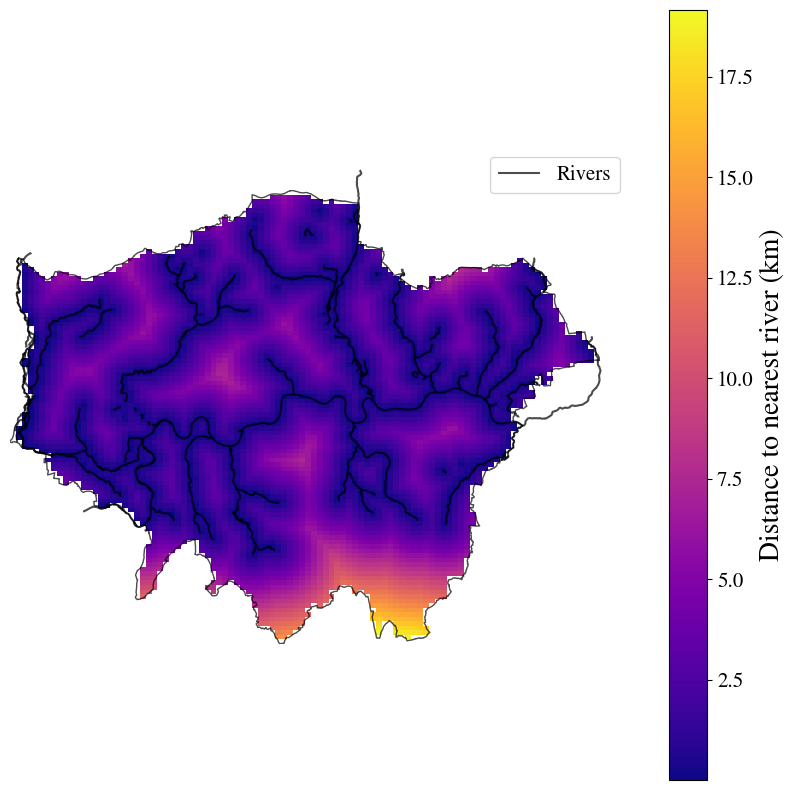

/var/folders/8s/r1tv_zb133bd4kybngpj82fc0000gp/T/ipykernel_28950/398336430.py:131: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(fontsize=15)


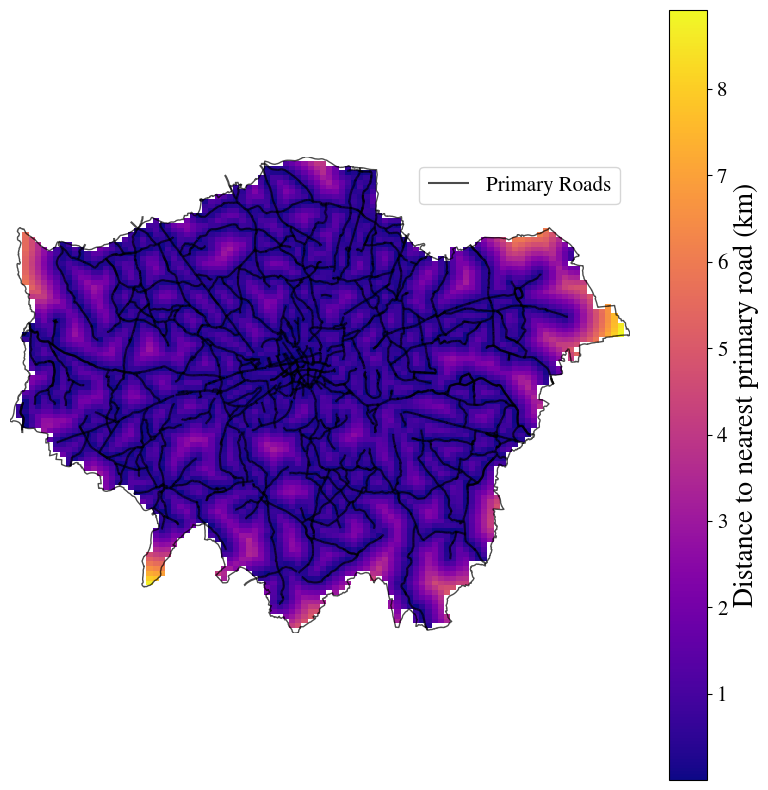

/var/folders/8s/r1tv_zb133bd4kybngpj82fc0000gp/T/ipykernel_28950/398336430.py:131: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(fontsize=15)


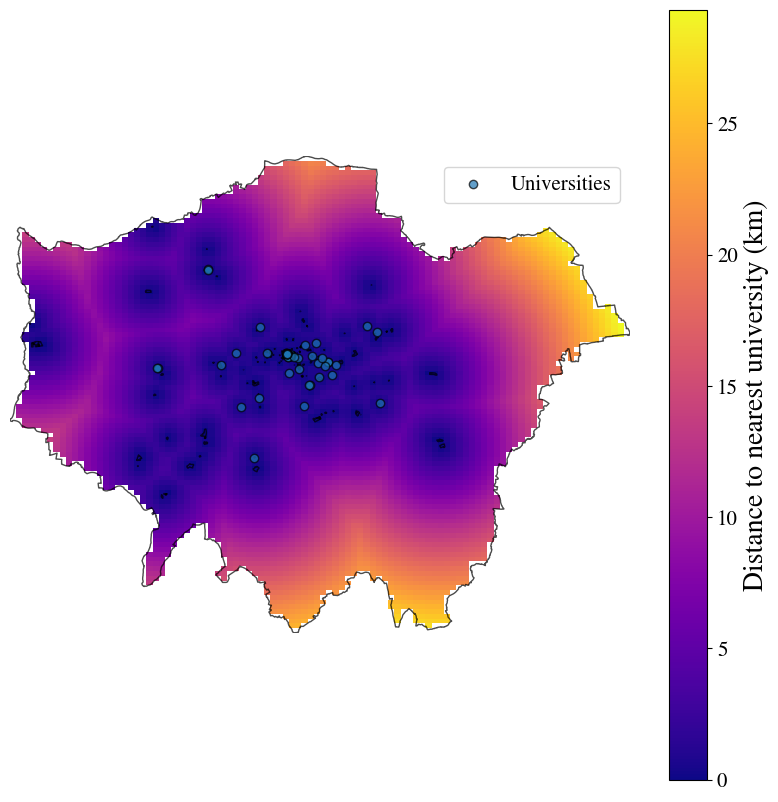

In [16]:
calculator.plot_grid(
    distances_grid_rivers / 1000,
    features=[osm_features_rivers, calculator.extent_roi],
    labels=['Rivers', 'Greater London'],
    colorbar_label='Distance to nearest river (km)'                                                        
)

calculator.plot_grid(
    distances_grid_primaryroads / 1000,
    features=[osm_features_primaryroads, calculator.extent_roi],
    labels=['Primary Roads', 'Greater London'],
    colorbar_label='Distance to nearest primary road (km)'
)

calculator.plot_grid(
    distances_grid_universities / 1000,
    features=[osm_features_universities, calculator.extent_roi],                           
    labels=['Universities', 'Greater London'],
    colorbar_label='Distance to nearest university (km)'
)

# `Google Earth Engine` (GEE) Python API 🛰️
* GEE is a cloud-based platform for environmental data analysis. 
* It provides access to archives of satellite imagery and geospatial datasets, such as the Sentinel and Landsat missions.
* Here is the official tutorial from the developers: https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api

## Authenticate to GEE
* It will prompt a Google webpage where you will need to input a `Gmail` account.
* Then you will have to copy-paste an authentification code into your `IDE` (I am using `VSCode`).

In [2]:
try:
    ee.Initialize()

except Exception as e:
    ee.Authenticate()
    ee.Initialize()


Successfully saved authorization token.


## Find collection of interest 📚
* Consult this website to see all the collections available on GEE, including climate and weather, imagery, and geophysical data: https://developers.google.com/earth-engine/datasets. 
* As mentioned in the GEE documentation, there are 3 types of datasets:
    * `ee.Feature` $\rightarrow$ typically a list of properties of an area, such as the name of the area.
    * `ee.Image` $\rightarrow$ 'one-off' datasets (i.e., not temporally-dependent) such as ground elevation. Images can have multiple bands.
    * `ee.Collections` $\rightarrow$ groups of features or images, such as images of a region taken a different times.

In [3]:
# Sentinel-2 image collection (Top-of-Atmosphere reflectance)
ic_S2 = ee.ImageCollection('COPERNICUS/S2_HARMONIZED')

# Landsat-8 image collection (Tier 1 Top-of-Atmosphere reflectance)
ic_L8 = ee.ImageCollection("LANDSAT/LC08/C02/T1_TOA")

# MODIS image collection (MOD09GA, Terra)
ic_MODIS = ee.ImageCollection("MODIS/061/MOD09GA")

# USGS ground elevation image
elv = ee.Image('USGS/SRTMGL1_003') # careful: this is an image, not an image collection

## Define the **time period** and filter the image collection 🕜

In [4]:
# start date
start_date = '2021-01-01'

# end date
end_date = '2021-12-31'

# filter the image collection by date
ic_S2_timefiltered = ic_S2.filterDate(start_date, end_date)
ic_L8_timefiltered = ic_L8.filterDate(start_date, end_date) 
ic_MODIS_timefiltered = ic_MODIS.filterDate(start_date, end_date)

## Define the **region of interest**

### Manually 🔧
* You can go on Google Maps and copy-paste the coordinates `(longitude, latitude)` from your area of interest.
* ⚠️Careful⚠️ $\rightarrow$ the format on Google Maps is `(latitude, longitude)`, so make sure to reverse them!

In [5]:
# point of interest (middle of Hyde Park)
latitude_HP, longitude_HP = 51.50800123106138, -0.17062550540916185
ee_point_HP = ee.Geometry.Point([longitude_HP, latitude_HP])

# polygon of interest
spatial_var = 0.01 # add a buffer of 0.01 degrees
ee_polygon_HP = ee.Geometry.Polygon(
    [[longitude_HP - spatial_var, latitude_HP - spatial_var],
     [longitude_HP + spatial_var, latitude_HP - spatial_var],
     [longitude_HP + spatial_var, latitude_HP + spatial_var],
     [longitude_HP - spatial_var, latitude_HP + spatial_var]]
)

### Using `OpenStreetMap` 🌍
* Conveniently, we just learned about this! You can easily query geospatial information from your area of interest, such as the coordinates, polygon and bounding box.
* `OpenStreetMap` is also very useful if you want to automate your code. For example, in my work which involves thousand of islands, it's much more convenient to query from OSM rather than copy-pasting the coordinates from Google Maps for each island.

In [6]:
aoi = 'Hulhudhoo, Maldives' # one of the islands that I study :)

# query geocode from OpenStreetMap
aoi_gdf = ox.geocode_to_gdf(aoi)

# point of longitude and latitude
ee_point_island = ee.Geometry.Point(aoi_gdf.lon.values[0], aoi_gdf.lat.values[0])

# polygon of the region of interest
box_coords = aoi_gdf.total_bounds
spatial_var = 0.001 # add a buffer of 0.001 degrees
ee_polygon_island = ee.Geometry.Polygon(
    [[
        [box_coords[0] - spatial_var, box_coords[1] - spatial_var],
        [box_coords[2] + spatial_var, box_coords[1] - spatial_var],
        [box_coords[2] + spatial_var, box_coords[3] + spatial_var],
        [box_coords[0] - spatial_var, box_coords[3] + spatial_var],
        [box_coords[0] - spatial_var, box_coords[1] - spatial_var]
    ]]
)

### Filter the image collection by location
* `.filterBounds()` will select the data tile (i.e., the correspond 'box' in the data grid) that contains the area of interest. So the result will be the entire tile, not just the polygon itself.
* `.clip()` will crop an `ee.Image` (not an `ee.ImageCollection`) around the polygon.

In [7]:
# filter the image collection by location (Hyde Park)
ic_S2_locfiltered_HP = ic_S2.filterBounds(ee_polygon_HP)
ic_L8_locfiltered_HP = ic_L8.filterBounds(ee_polygon_HP)
ic_MODIS_locfiltered_HP = ic_MODIS.filterBounds(ee_polygon_HP)

# filter the image collection by location (island)
ic_S2_locfiltered_island = ic_S2.filterBounds(ee_polygon_island)
ic_L8_locfiltered_island = ic_L8.filterBounds(ee_polygon_island)
ic_MODIS_locfiltered_island = ic_MODIS.filterBounds(ee_polygon_island)

## Sort or filter by cloud cover ☁️
* In reality, most remote sensing images are imperfect! And the biggest culprit is cloud cover.
* You can **sort** the image collection by the percentage of cloud cover using `.sort('CLOUDY_PIXEL_PERCENTAGE')` (Sentinel-2) or `.sort('CLOUD_COVER')` (Landsat) so that the first `Image` of the `ImageCollection` is cloud-free.
* You can also **filter** the data by the percentage of cloud cover using e.g. `.filter(ee.Filter.eq('CLOUD_COVER', 20))` which will remove all images with more than 20% cloud cover.
* `.sort()` or `.filter()` can also be used to crop or filter the `ImageCollection` by other features or metadata.

In [8]:
# sort the image collection by cloud cover
ic_S2_sorted = ic_S2.sort('CLOUDY_PIXEL_PERCENTAGE')
ic_L8_sorted = ic_L8.sort('CLOUD_COVER')
ic_MODIS_sorted = ic_MODIS.sort('CLOUD_COVER')

# filter the image collection by cloud cover
ic_S2_cloudfiltered = ic_S2.filter(ee.Filter.eq('CLOUDY_PIXEL_PERCENTAGE', 20))
ic_L8_cloudfiltered = ic_L8.filter(ee.Filter.eq('CLOUD_COVER', 20))
ic_MODIS_cloudfiltered = ic_MODIS.filter(ee.Filter.eq('CLOUD_COVER', 20))

## Display an image using `geemap` 📷

### Select an image
* `.first()` selects the first `Image` in the `ImageCollection`.

In [9]:
# filter/sort the original image collection by time, location, and cloud cover
ic_S2_filtered_HP = ic_S2.filterBounds(ee_polygon_HP).filterDate(start_date, end_date).sort('CLOUDY_PIXEL_PERCENTAGE')
ic_L8_filtered_HP = ic_L8.filterBounds(ee_polygon_HP).filterDate(start_date, end_date).sort('CLOUD_COVER')
ic_MODIS_filtered_HP = ic_MODIS.filterBounds(ee_polygon_HP).filterDate(start_date, end_date).sort('CLOUD_COVER')

ic_S2_filtered_island = ic_S2.filterBounds(ee_polygon_island).filterDate(start_date, end_date).sort('CLOUDY_PIXEL_PERCENTAGE')
ic_L8_filtered_island = ic_L8.filterBounds(ee_polygon_island).filterDate(start_date, end_date).sort('CLOUD_COVER')
ic_MODIS_filtered_island = ic_MODIS.filterBounds(ee_polygon_island).filterDate(start_date, end_date).sort('CLOUD_COVER')

# get the first image from the filtered image collection and crop it to the region of interest (Hyde Park)
image_S2_HP = ic_S2_filtered_HP.first().clip(ee_polygon_HP)
image_L8_HP = ic_L8_filtered_HP.first().clip(ee_polygon_HP)
image_MODIS_HP = ic_MODIS_filtered_HP.first().clip(ee_polygon_HP)

# get the first image from the filtered image collection and crop it to the region of interest (island)
image_S2_island = ic_S2_filtered_island.first().clip(ee_polygon_island)
image_L8_island = ic_L8_filtered_island.first().clip(ee_polygon_island)
image_MODIS_island = ic_MODIS_filtered_island.first().clip(ee_polygon_island)


### Create an interactive map
* You might have to adjust the visualisation parameters to see the images properly.
* You can display one band or create image composites (more on this in the lectures and the other tutorials).
* Here, we will display in the image in RGB for Sentinel and Landsat (bands B4, B3 and B2).
* Pay attention to the difference in spatial resolutions!

In [10]:
# create a map centered at Hyde Park    
map = geemap.Map(center=[latitude_HP, longitude_HP], zoom=10)

# add Sentinel-2, Landsat-8, and MODIS to the map
map.addLayer(image_S2_HP, {'bands': ['B4', 'B3', 'B2']}, 'Sentinel-2')
map.addLayer(image_L8_HP, {'bands': ['B4', 'B3', 'B2']}, 'Landsat-8')
map.addLayer(image_MODIS_HP, {'bands': ['sur_refl_b01', 'sur_refl_b04', 'sur_refl_b03']}, 'MODIS')

# display the map
map

Map(center=[51.50800123106138, -0.17062550540916185], controls=(WidgetControl(options=['position', 'transparen…

In [11]:
# create a map centered at the island
map = geemap.Map(center=[aoi_gdf.lat.values[0], aoi_gdf.lon.values[0]], zoom=15)

# add Sentinel-2, Landsat-8, and MODIS to the map
map.addLayer(image_S2_island, {'bands': ['B4', 'B3', 'B2']}, 'Sentinel-2')
map.addLayer(image_L8_island, {'bands': ['B4', 'B3', 'B2']}, 'Landsat-8')
map.addLayer(image_MODIS_island, {'bands': ['sur_refl_b01', 'sur_refl_b04', 'sur_refl_b03']}, 'MODIS')

# display the map
map

Map(center=[np.float64(5.0711913), np.float64(73.0320286)], controls=(WidgetControl(options=['position', 'tran…

### Get metadata
* This is very important, especially if you plan to compare multiple images!
* The most important metadata for remote sensing is the coordinate reference system (`crs`) and transform matrix (`transform`).

In [ ]:
metadata_image_S2_HP = image_S2_HP.getInfo()
print(metadata_image_S2_HP.keys())

## Download/export data as `GeoTIFF` files 📂

### On `Google Drive`
* See https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api#save_a_geotiff_file_in_your_google_drive.

### On your local drive (indirectly via `requests`)

In [ ]:
def download_from_GEE(image_GEE, satellite:str, scale:int, region:ee.Geometry, region_name:str, crs='EPSG:4326', data_dir:str='data', overwrite_file:bool=False):
    """
    Download an image from Google Earth Engine.
    
    Parameters:
        image (ee.Image): The image to download.
        scale (int): The scale of the image.
        region (ee.Geometry): The region to download the image.
        region_name (str): The name of the region.
    """
    # make sure the directory exists
    os.makedirs(data_dir, exist_ok=True)

    # get the image as a URL
    url_image = image_GEE.getDownloadURL({
            'scale': scale,
            'crs': crs,
            'fileFormat': 'GeoTIFF',
            'region': region,
            'filePerBand': False
    })

    # download the ZIP file
    temporary_file = os.path.join(data_dir, f'{region_name}.zip')
    response = requests.get(url_image)
    with open(temporary_file, "wb") as file:
        file.write(response.content)

    # unzip the file
    with zipfile.ZipFile(temporary_file, "r") as zip_ref:
        zip_ref.extractall(data_dir)
        extracted_file = zip_ref.namelist()

        if len(extracted_file) == 1:
            extracted_file = os.path.join(data_dir, extracted_file[0])
        
        else:
            raise ValueError(f"More than one file was extracted: {extracted_file}")

    # remove the ZIP file
    os.remove(temporary_file)

    # rename the extracted file
    date_image = extracted_file.split(os.sep)[1][:7]
    date_image_YYYYMMDD = '{}-{}-{}'.format(date_image[:4], date_image[4:6], date_image[6:])
    new_file = os.path.join(data_dir, f'{region_name}_{date_image_YYYYMMDD}_{satellite}.tif')

    if os.path.exists(new_file) and overwrite_file:
        os.remove(new_file)
        os.rename(extracted_file, new_file)
    
    elif not os.path.exists(new_file):
        os.rename(extracted_file, new_file)
    
    elif os.path.exists(new_file) and not overwrite_file:
        os.remove(extracted_file)
        return new_file

    return new_file

In [ ]:
# Hyde Park
tiffile_HP = download_from_GEE(image_GEE=image_S2_HP, 
                                 satellite='S2', 
                                 scale=10, 
                                 region=ee_polygon_HP, 
                                 region_name='Hyde_Park_London')

# Hulhudhoo island, Maldives
tiffile_island = download_from_GEE(image_GEE=image_S2_island,
                                      satellite='S2',
                                      scale=10,
                                      region=ee_polygon_island,
                                      region_name='Hulhudhoo_Maldives')

# Bonus: combining `OpenStreetMap` and `Google Earth Engine` 🙌

In [ ]:
def tiff_to_xarray(tif_file: str):
    """
    Convert a GeoTIFF file to an xarray DataArray with latitude and longitude coordinates.
    
    Parameters:
        tif_file (str): Path to the GeoTIFF file.
        
    Returns:
        xarray.DataArray: The corresponding xarray DataArray with lat/lon coordinates.
    """
    # open the TIFF file using rasterio
    with rasterio.open(tif_file) as src:
        # read the image data into a numpy array
        img_data = src.read()  # (bands, rows, cols)
        
        # get metadata
        transform = src.transform
        crs = src.crs
        nodata = src.nodata
        height, width = src.height, src.width
        bands = src.count

        # latitude and longitude arrays
        lon = np.linspace(transform.c, transform.c + transform.a * (width - 1), width)
        lat = np.linspace(transform.f, transform.f + transform.e * (height - 1), height)

        # handle single-band images
        if bands == 1:
            img_data = img_data[0, :, :]  # (rows, cols)

        # create an xarray DataArray with lat/lon as dimensions
        data_array = xr.DataArray(
            img_data,
            dims=["band", "lat", "lon"] if bands > 1 else ["lat", "lon"],
            coords={
                "band": np.arange(1, bands + 1) if bands > 1 else None,
                "lat": lat,
                "lon": lon,
            },
            attrs={
                "transform": transform,
                "crs": crs,
                "nodata": nodata,
            },
        )

    return data_array

## Plot the Serpentine (from `OSM`) on the Hyde Park remote sensing image

In [ ]:
# read tif file and transform into xarray
xrx_HP = tiff_to_xarray(tiffile_HP)

# extent of the image
extent = [xrx_HP.lon.min().item(), xrx_HP.lon.max().item(), xrx_HP.lat.min().item(), xrx_HP.lat.max().item()]

# initialise the class
calculator = DistanceGridCalculator('Hyde Park, England, UK', crs=4326)

# query features: lakes
feature_lakes = ox.features_from_place(calculator.roi, tags={'natural': 'water', 'water':'lake'}).to_crs(f'EPSG:{calculator.crs}')

# plot
fig, ax = plt.subplots(figsize=(10, 10))

# plot RGB
gdf_rgb = xrx_HP.sel(band=[4, 3, 2]) 
gdf_rgb.plot.imshow(robust=True, ax=ax)

# plot lakes
feature_lakes.plot(ax=ax, alpha=0.7, edgecolor='red', facecolor='none')

# aesthetics
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])

plt.show()

## Plot the reference coastline (from `OSM`) on the island remote sensing image

In [ ]:
# read tif file and transform into xarray
xrx_HP = tiff_to_xarray(tiffile_island)

# extent of the image
extent = [xrx_HP.lon.min().item(), xrx_HP.lon.max().item(), xrx_HP.lat.min().item(), xrx_HP.lat.max().item()]

# initialise the class
calculator = DistanceGridCalculator('Hulhudhoo, Maldives', crs=4326)

# create meshgrid from image
pp = calculator.create_meshgrid_from_image(xrx_HP, scale=10)

# query features: reference coastline
feature_coastline = ox.features_from_place(calculator.roi, tags={'natural': 'coastline'}).to_crs(f'EPSG:{calculator.crs}')

# compute distance grid
distance_grid = calculator.compute_distance_grid(pp, feature_coastline, mask=False)

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# plot RGB
gdf_rgb = xrx_HP.sel(band=[4, 3, 2]) 
gdf_rgb.plot.imshow(robust=True, ax=ax1)

# plot coastline
feature_coastline.plot(ax=ax1, alpha=0.7, edgecolor='red', facecolor='none')

# plot distance grid
cf = ax2.imshow(distance_grid, cmap='plasma', extent=[extent[0], extent[1], extent[2], extent[3]])

# aesthetics
ax1.set_xlim(extent[0], extent[1])
ax1.set_ylim(extent[2], extent[3])
ax1.axis('off') 
ax2.axis('off')
ax1.set_title('Sentinel-2 RGB Image + Reference Coastline from OSM', fontsize=15)
ax2.set_title('Distance to Reference Coastline', fontsize=15)

plt.show()

# Summary 📕
* `OpenStreetMap` and `Google Earth Engine` are wonderful open-source tools that you can use in Python and online.
* With `Google Earth Engine`, you can do all of your operations on their built-in online platform, in Python using their API (full documentation: https://developers.google.com/earth-engine/api_docs) or by downloading your data from GEE and develop your own tools!
* Consider using `OpenStreetMap` to automate your code or to extract valuable features (either for display or e.g. as a machine learning feature)!